# Zum Einstieg

## Vorbereitung der Daten
Dieses Notebook zeigt die Schritte, die wir in der Regel brauchen, um mit den Daten zu arbeiten.

Dazu ist es zunächst nötig, die Daten lokal auf den Rechner zu speichern. Dazu legt ihr euch lokal im Hauptverzeichnis einen Ordner namens "data" an (`bundestagsreden/data/`). Die Daten liegen als ZIP File im Ilias. Die müssen in diesen neuen Ordner entpackt werden.

Keine Angst, wenn das nicht gelingt. In der ersten Sitzung können wir evtl. Probleme beseitigen.

## Jupyter Notebook

Dies ist ein Jupyter Notebook. Es erlaubt einzelne, in Python geschriebene Programmteile als Skripte auszuführen und ist damit für die Entwicklung von Algorithmen und Exploration von Daten sehr gut geeignet.

## Wir fangen einfach an!

In Python fangen wir eigentlich immer damit an uns aus dem Pool der verfügbaren Dinge zu bedienen. Wir importieren also Bibliotheken (libraries), die wir brauchen werden.
- jsonlines: in diesem Format sind die Daten abgespeichert.
- matplotlib: für die Visualisierung

***Wichtig:*** Nicht alle libraries sind schon installiert. In Python holt man sich, was man braucht. Wenn ihr also etwas seht wie "Module not found", dann muss die library noch auf euerem System installiert werden. Ich nutze dazu `pip install library-name`. Es gibt aber zu jeder library auch die Anleitung im Netz.

In [26]:
import jsonlines
import matplotlib.pyplot as plt

Hiermit laden wir die Daten der 20. Legislaturperiode. Man kann ganz oben alternative auch die 19. Wahlperiode wählen.

In [27]:
legislatur = 20

alleReden = []
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
        #for line in list(f):
        alleReden.append(line)

alleReden.sort(key = lambda x:x['date'])

Schauen wir doch mal, wie viele Reden das sind ...

In [28]:
print(len(alleReden))

19543


... und was drin ist:

In [29]:
welche = 10
#welche = 1201    # das ist eine Auskommentierung. D.h. der Code wird nicht ausgeführt.
print(alleReden[welche])

{'text': 'Ich nehme die Wahl an, bedanke mich auf das Herzlichste für das Vertrauen und freue mich auf die Zusammenarbeit. – Vielen Dank. Vielen Dank. – Frau Kollegin Roth, nehmen Sie die Wahl an? ', 'name': 'Yvonne Magwas', 'party': 'CDU/CSU', 'redner_id': '11004346', 'id': 'ID20101100', 'period': '20', 'date': '2021-10-26', 'discussion_title': 'Tagesordnungspunkt 6 2021-10-26'}


## Informationen in den Daten und Ausgabe mit "print"

Es gibt also die Felder, `text`, `name`,`party`,`redner_id`,`id`,`period`,`date` und `discussion_title`. Wenn wir auf eines dieser Felder in einer bestimmten Rede zugreifen wollen, dann geht das so:

In [30]:

print(f'Die {welche}. Rede wurde gehalten von {alleReden[welche]["name"]} (bei der {alleReden[welche]["party"]}) und enthält folgenden Text: \n {alleReden[welche]["text"]}')


Die 10. Rede wurde gehalten von Yvonne Magwas (bei der CDU/CSU) und enthält folgenden Text: 
 Ich nehme die Wahl an, bedanke mich auf das Herzlichste für das Vertrauen und freue mich auf die Zusammenarbeit. – Vielen Dank. Vielen Dank. – Frau Kollegin Roth, nehmen Sie die Wahl an? 


# Suche/Filtern

In der Regel werden wir auf einen bestimmten Ausschnitt -- eine Untermenge -- der Daten schauen. Dies kann sein:
- Reden, in denen ein bestimmtes Wort vorkommt
- Reden einer bestimmten Person
- Reden einer Partei
- Reden in einer bestimmten zeitlichen Periode
- ...

Im folgenden möchte ich alle Reden, die "künstliche Intelligenz" enthalten.

In [31]:
such_wort = 'künstliche Intelligenz'

untermenge = [ rede for rede in alleReden if such_wort in rede['text']]
print(f'Die Suche nach "{such_wort}" ergab {len(untermenge)} Reden')

Die Suche nach "künstliche Intelligenz" ergab 113 Reden


Nun wollen wir vielleicht noch wissen, wie oft eine bestimmte Partei "künstliche Intelligenz" erwähnt. Und vielleicht auch, welcher Politiker bzw. welche Politikerin bei der Partei sich dazu äußert.

In [32]:
partei = "SPD"
untermenge2 = [ rede for rede in untermenge if partei in rede['party']]
print(f'Es gibt {len(untermenge2)} Reden von der {partei}, die "{such_wort}" enthalten.')

Es gibt 23 Reden von der SPD, die "künstliche Intelligenz" enthalten.


## Eine erste Analyse mit Visualisierung

Zum Abschluss dieses Einführenden Notebook wollen wir schauen, wei oft die verschiedenen Parteien "künstliche Intelligenz" erwähnen. Und wir wollen das Resultat visualisieren.

In [33]:
parteien = ['SPD','FDP','CDU','LINKE','GRÜNEN','AfD','unknown'] # sind die richtig geschrieben?

such_wort = 'künstliche Intelligenz'
untermenge = [ rede for rede in alleReden if such_wort in rede['text']]

frequencies = []
for partei in parteien:
    untermenge2 = [ rede for rede in untermenge if partei in rede['party']]
    print(f'Die {partei} hat {len(untermenge2)} Reden mit "{such_wort}" gehalten.')
    frequencies.append(len(untermenge2))

Die SPD hat 23 Reden mit "künstliche Intelligenz" gehalten.
Die FDP hat 12 Reden mit "künstliche Intelligenz" gehalten.
Die CDU hat 16 Reden mit "künstliche Intelligenz" gehalten.
Die LINKE hat 2 Reden mit "künstliche Intelligenz" gehalten.
Die GRÜNEN hat 12 Reden mit "künstliche Intelligenz" gehalten.
Die AfD hat 7 Reden mit "künstliche Intelligenz" gehalten.
Die unknown hat 39 Reden mit "künstliche Intelligenz" gehalten.


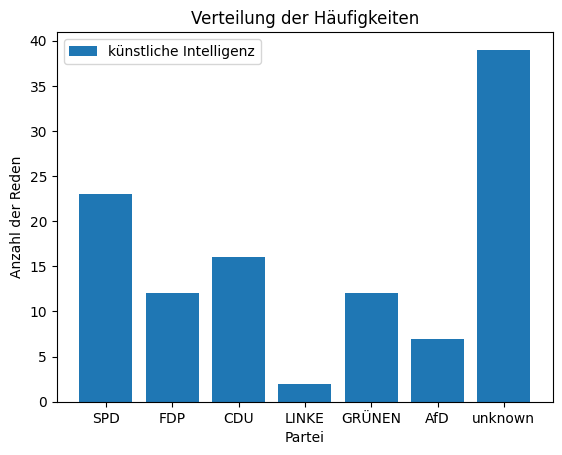

In [34]:


plt.bar(parteien,frequencies,label=f'{such_wort}')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Partei")
plt.ylabel("Anzahl der Reden")
plt.legend(loc="upper left")

plt.show()

# Aufgaben und Fragen

#### Warum sind so viele Reden dabei, bei denen die Parteizugehörigkeit unbekannt ist?

---> Finde die Namen dieser Redner heraus!
---> Gibt es spezifische Tagesordnungspunkte (TOPs), wie beispielsweise Expertenanhörungen?

#### Wie idendifizieren wir Reden, in denen es wirklich um KI geht, und das Thema nicht nur nebenbei erwähnt wird?

---> Welche Worten stehen mit KI im Zusammenhang?

## Übungen (Suche/Filtern der Daten):
  
1. Probiert das für andere Worte aus.
2. Findet Reden, in denen mehrere gegebene Worte vorkommen.
3. Findet Reden einer bestimmten Person.
4. Reden einer Partei.
5. Reden in einer bestimmten zeitlichen Periode.
6. Kombiniert das nach Belieben (z.B. alle Reden dieses Jahres der SPD zu einem Thema)

